In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import product
import matplotlib.cm as cm

/var/folders/1c/f0py8khj3bx759_g1q03n6fc0000gn/T/ipykernel_21836/3074411568.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [40]:
# Optional preamble, for latex-looking figures

import os
# Get path with the command `which latex`
os.environ["PATH"] = "/Library/TeX/texbin:$PATH"
plt.rcParams.update({
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Helvetica"],
    # To have access to AMS maths commands
    'text.latex.preamble': r'\usepackage{amsmath}',
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
})

In [45]:
# Generate random data
index = pd.MultiIndex.from_tuples(
    product(("France", "USA"), ("Food", "Mobility"), ("D", "DP", "DPS")),
    names=['Country', 'Sector', 'Category']
)

np.random.seed(0)  # for reproducibility
data = [-0.9, -1.1, -0.5, -2.6, -2.5, -2.3, - 0.52, -0.79, -0.23, -1.7, -1.3, -0.9]
# data = -np.random.rand(len(index))
series = pd.Series(data, index=index)

series

Country  Sector    Category
France   Food      D          -0.90
                   DP         -1.10
                   DPS        -0.50
         Mobility  D          -2.60
                   DP         -2.50
                   DPS        -2.30
USA      Food      D          -0.52
                   DP         -0.79
                   DPS        -0.23
         Mobility  D          -1.70
                   DP         -1.30
                   DPS        -0.90
dtype: float64

In [46]:
n_countries = series.index.get_level_values("Country").nunique()
n_sectors = series.index.get_level_values("Sector").nunique()
n_categories = series.index.get_level_values("Category").nunique()

In [47]:
# Some sizes in the plot, see figure for details 

# Size of blank space over size of ensemble of categories
ratio_space = 0.5

# Half-Blank Sector1 Blank Sector2 ... SectorN Half-Blank 
size_sectors = 1 / (n_sectors + ratio_space * n_sectors )
size_blank = ratio_space * size_sectors

# For each sector, multiple categories displayed
size_categories = size_sectors / n_categories

# Amount of space between bars and labels 
y_text_offset = 0.05
y_label_categories = 0.03
y_label_sector = 0.08

In [50]:
# Some sizes in the plot, see figure for details

# Size of blank space over size of ensemble of categories
ratio_space = 0.5

# Half-Blank Sector1 Blank Sector2 ... SectorN Half-Blank
size_sectors = 1 / (n_sectors + ratio_space * n_sectors )
size_blank = ratio_space * size_sectors

# For each sector, multiple categories displayed
size_categories = size_sectors / n_categories

# Amount of space between bars and labels
y_text_offset = 0.25
y_label_categories = 0.05
y_label_sector = 0.2

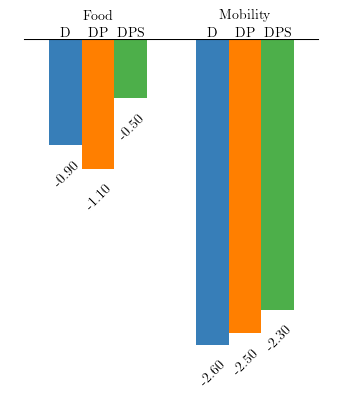

In [52]:
## Select the country 
s_country = series.xs('France', level='Country')

## The ax: we plot a single black line from 0 to 1 

# Get the textwidth from latex with \the\textwidth (or \showthe\textwidth).
fig, ax = plt.subplots(figsize=(300/72, 300/72))
ax.spines['left'].set_visible(False)  # hide the left spine
ax.spines['right'].set_visible(False)  # hide the right spine
ax.spines['bottom'].set_visible(False)  # hide the top spine
ax.spines['top'].set_visible(False)  # hide the top spine
ax.yaxis.set_visible(False)  # hide the y-axis
ax.xaxis.set_visible(False)  # hide the y-axis
ax.plot([0, 1], [0, 0], color='black')

## Select the palette 

# A color-blind friendly palette
palette = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']
# Default palette
# palette = cm.tab10(9)

colors = {
    k: v for k, v in zip(
        s_country.index.get_level_values("Category").unique(), 
        palette)}

# Some keyword so that s in ax.text(x, y, s) is aligned around (x, y)
text_align = {
    "horizontalalignment": "center", "verticalalignment": "center"
}

# We start with a blank offset 
current_x = size_blank / 2 

# For each sector... 
for ind_sector, sector in enumerate(s_country.index.get_level_values("Sector").unique()):
    # Restrict the dataframe 
    s_sector = s_country.xs(sector, level="Sector")
    # Print the name of the sector: 
    # Leave half a blank, then multiple sectors, then multiple full blanks 
    ax.text(size_blank * (ind_sector + 0.5) + size_sectors * (ind_sector + 0.5), y_label_sector, sector, **text_align)
    
    # For each category...
    for category in s_sector.index.get_level_values("Category").unique():
        # This is the value we plot 
        current_y = s_sector.loc[category]
        plt.bar(current_x, current_y, width=size_categories, color=colors[category], align="edge")
        
        # This is the label 
        ax.text(current_x + size_categories / 2, y_label_categories, category, **text_align)
        # This is the value, below the bar
        ax.text(current_x + size_categories / 2, current_y - y_text_offset, f"{current_y:.2f}", rotation=45, **text_align)
        # Next plot will be a bit further
        current_x += size_categories
    
    # We skip a blank 
    current_x += size_blank

fig.savefig(f"output_france.pdf", transparent=True, bbox_inches='tight', pad_inches=0)


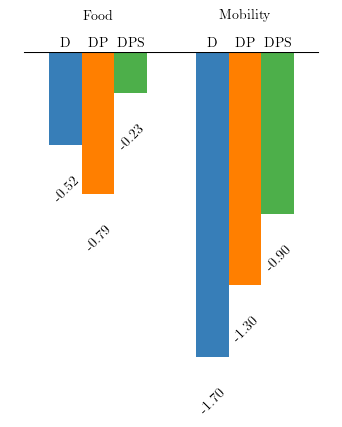

In [54]:
## Select the country
s_country = series.xs('USA', level='Country')

## The ax: we plot a single black line from 0 to 1

# Get the textwidth from latex with \the\textwidth (or \showthe\textwidth).
fig, ax = plt.subplots(figsize=(300/72, 300/72))
ax.spines['left'].set_visible(False)  # hide the left spine
ax.spines['right'].set_visible(False)  # hide the right spine
ax.spines['bottom'].set_visible(False)  # hide the top spine
ax.spines['top'].set_visible(False)  # hide the top spine
ax.yaxis.set_visible(False)  # hide the y-axis
ax.xaxis.set_visible(False)  # hide the y-axis
ax.plot([0, 1], [0, 0], color='black')

## Select the palette

# A color-blind friendly palette
palette = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']
# Default palette
# palette = cm.tab10(9)

colors = {
    k: v for k, v in zip(
        s_country.index.get_level_values("Category").unique(),
        palette)}

# Some keyword so that s in ax.text(x, y, s) is aligned around (x, y)
text_align = {
    "horizontalalignment": "center", "verticalalignment": "center"
}

# We start with a blank offset
current_x = size_blank / 2

# For each sector...
for ind_sector, sector in enumerate(s_country.index.get_level_values("Sector").unique()):
    # Restrict the dataframe
    s_sector = s_country.xs(sector, level="Sector")
    # Print the name of the sector:
    # Leave half a blank, then multiple sectors, then multiple full blanks
    ax.text(size_blank * (ind_sector + 0.5) + size_sectors * (ind_sector + 0.5), y_label_sector, sector, **text_align)

    # For each category...
    for category in s_sector.index.get_level_values("Category").unique():
        # This is the value we plot
        current_y = s_sector.loc[category]
        plt.bar(current_x, current_y, width=size_categories, color=colors[category], align="edge")

        # This is the label
        ax.text(current_x + size_categories / 2, y_label_categories, category, **text_align)
        # This is the value, below the bar
        ax.text(current_x + size_categories / 2, current_y - y_text_offset, f"{current_y:.2f}", rotation=45, **text_align)
        # Next plot will be a bit further
        current_x += size_categories

    # We skip a blank
    current_x += size_blank

fig.savefig(f"output_us.pdf", transparent=True, bbox_inches='tight', pad_inches=0)
